#### Importing Libraries

In [1]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam, SGD, Adagrad, Adamax, RMSprop
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPool2D, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAvgPool2D, Dropout
from sklearn.preprocessing import LabelEncoder

In [2]:
data_dir = 'C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset'
output = 'C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split'
splitfolders.ratio(data_dir, output=output, seed=42, ratio=(0.7,0.1, 0.2)) 

Copying files: 13808 files [00:43, 320.76 files/s]


In [3]:
train_dir = os.path.join('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split/train')
validation_dir = os.path.join('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split/val')
test_dir = os.path.join('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split/test')

In [4]:
# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [5]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [6]:
# gather test data
testX = []
testY = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

In [8]:
# check shape of each images in train & val dataset
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape) 
print("Test Data=", testX.shape)
print("Test Label=", testY.shape) 

Train Data= (9665, 150, 150, 3)
Train Label= (9665,)
Validation Data= (1380, 150, 150, 3)
Validation Label= (1380,)
Test Data= (2763, 150, 150, 3)
Test Label= (2763,)


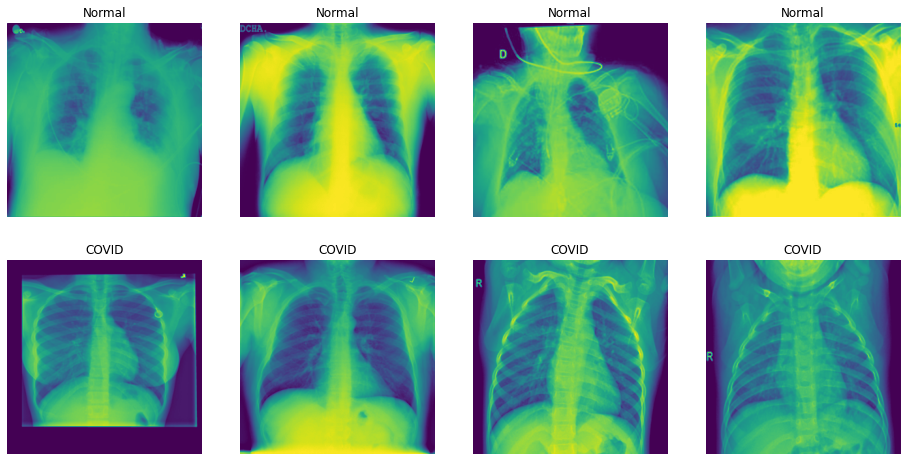

In [9]:
%matplotlib inline


train_COVID_dir = os.path.join('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split/train/COVID')
train_Normal_dir = os.path.join('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/dataset_split/train/Normal')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 4

next_COVID_pix = [os.path.join(train_COVID_dir, fname)
                        for fname in os.listdir(train_COVID_dir)[pic_index-4:pic_index]]
next_Normal_pix = [os.path.join(train_Normal_dir, fname)
                       for fname in os.listdir(train_Normal_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_COVID_pix+next_Normal_pix):
    # Set up subplot; subplot indices start at 1
    if(i < 4) :
        title = "Normal"
    else:
        title = "COVID"
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.title(title)
    img = mpimg.imread(img_path)
    plt.imshow(img)


plt.show()

In [10]:
# label encoder implementation in each train & validation label
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)
testY = lb.fit_transform(testY)

In [11]:
datagen = ImageDataGenerator(
                    rescale=1.0/255.0,
                    rotation_range=30,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.1,
                    shear_range=0.1)

In [12]:
train_iterator = datagen.flow_from_directory(
    train_dir,
    batch_size=40,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True)

val_iterator = datagen.flow_from_directory(
    directory=validation_dir,
    batch_size=40,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True)

test_iterator = datagen.flow_from_directory(
    directory=test_dir,
    batch_size=40,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True)

Found 9665 images belonging to 2 classes.
Found 1380 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [13]:
# check maximum & minimum scale of each images
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))
print('Test min=%.f, max=%.f' % (testX.min(), testX.max())) 

Train min=0, max=255
Validation min=0, max=255
Test min=0, max=255


In [14]:
# check minimum & maximum scale after normalize each images
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(40, 150, 150, 3), min=0.000, max=1.000


Model 1

In [15]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=[150, 150, 3], activation='relu',))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model1.add(SpatialDropout2D(0.5))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))


model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(2,activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [16]:
# Compile model
from tensorflow.keras.optimizers.legacy import Adam

model1.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

c:\Users\putri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
H = model1.fit(train_iterator, epochs=100, steps_per_epoch=50 ,validation_data=val_iterator)

Epoch 1/100
50/50 [==============================] - 95s 2s/step - loss: 1.3425 - acc: 0.7035 - val_loss: 2.0353 - val_acc: 0.2623
Epoch 2/100
50/50 [==============================] - 86s 2s/step - loss: 0.7513 - acc: 0.7335 - val_loss: 1.9667 - val_acc: 0.2616
Epoch 3/100
50/50 [==============================] - 74s 1s/step - loss: 0.6002 - acc: 0.7710 - val_loss: 2.0714 - val_acc: 0.2616
Epoch 4/100
50/50 [==============================] - 90s 2s/step - loss: 0.5678 - acc: 0.7695 - val_loss: 1.0975 - val_acc: 0.2616
Epoch 5/100
50/50 [==============================] - 89s 2s/step - loss: 0.5849 - acc: 0.7600 - val_loss: 0.8549 - val_acc: 0.3174
Epoch 6/100
50/50 [==============================] - 88s 2s/step - loss: 0.5223 - acc: 0.7632 - val_loss: 0.8773 - val_acc: 0.3362
Epoch 7/100
50/50 [==============================] - 87s 2s/step - loss: 0.5167 - acc: 0.7805 - val_loss: 1.0576 - val_acc: 0.3145
Epoch 8/100
50/50 [==============================] - 84s 2s/step - loss: 0.5097 - a

In [18]:
model1.save('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/Kelompok/Modul 3 Model 1.h5')

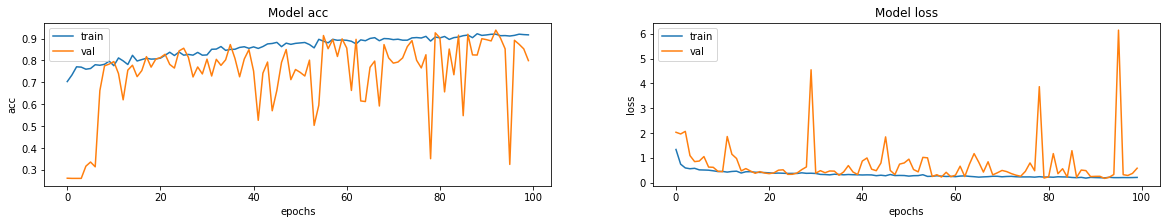

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pred = np.argmax(model1.predict(test_iterator), axis = -1)
print(classification_report(test_iterator.classes,pred))

70/70 [==============================] - 37s 526ms/step
              precision    recall  f1-score   support

           0       0.25      0.38      0.30       724
           1       0.73      0.59      0.65      2039

    accuracy                           0.54      2763
   macro avg       0.49      0.49      0.48      2763
weighted avg       0.60      0.54      0.56      2763



In [50]:
model2 = Sequential()
model2.add(InputLayer(input_shape=[150, 150, 3]))
model2.add(Conv2D(32, 3, padding = 'same' , activation = 'elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, 3, padding = 'same' , activation = 'elu'))
model2.add(MaxPool2D())
model2.add(BatchNormalization())
model2.add(Conv2D(64, 3, padding = 'same' , activation = 'elu'))
model2.add(SpatialDropout2D(0.2))
model2.add(MaxPool2D())
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Flatten())

model2.add(Dense(units = 128 , activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_17 (Bat  (None, 75, 75, 64)       256       
 chNormalization)                                                
                                                      

In [51]:
# Compile model
from tensorflow.keras.optimizers.legacy import Adamax

model2.compile(optimizer=Adamax(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [52]:
# training & saving history of every epoch
H2 = model2.fit(train_iterator, epochs=100, steps_per_epoch=50 ,validation_data=val_iterator)

Epoch 1/100
50/50 [==============================] - 206s 4s/step - loss: 1.0684 - acc: 0.7160 - val_loss: 0.7640 - val_acc: 0.4978
Epoch 2/100
50/50 [==============================] - 210s 4s/step - loss: 0.6159 - acc: 0.7300 - val_loss: 0.7234 - val_acc: 0.5616
Epoch 3/100
50/50 [==============================] - 205s 4s/step - loss: 0.5701 - acc: 0.7505 - val_loss: 0.7183 - val_acc: 0.6145
Epoch 4/100
50/50 [==============================] - 206s 4s/step - loss: 0.5786 - acc: 0.7490 - val_loss: 0.7016 - val_acc: 0.6732
Epoch 5/100
50/50 [==============================] - 203s 4s/step - loss: 0.5375 - acc: 0.7545 - val_loss: 0.6947 - val_acc: 0.7080
Epoch 6/100
50/50 [==============================] - 196s 4s/step - loss: 0.5311 - acc: 0.7430 - val_loss: 0.6861 - val_acc: 0.7065
Epoch 7/100
50/50 [==============================] - 188s 4s/step - loss: 0.5351 - acc: 0.7505 - val_loss: 0.6622 - val_acc: 0.7225
Epoch 8/100
50/50 [==============================] - 187s 4s/step - loss: 0.

In [53]:
model2.save('C:/TUGASKYU/SMT 7/Praktikum Machine Learning/Kelompok/Modul 3 Model 2.h5')

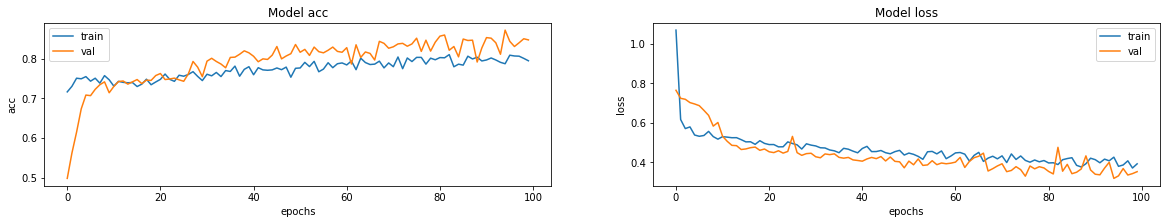

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(H2.history[met])
    ax[i].plot(H2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pred = np.argmax(model2.predict(test_iterator), axis = -1)
print(classification_report(test_iterator.classes,pred))

70/70 [==============================] - 59s 847ms/step
              precision    recall  f1-score   support

           0       0.25      0.13      0.17       724
           1       0.74      0.86      0.79      2039

    accuracy                           0.67      2763
   macro avg       0.49      0.50      0.48      2763
weighted avg       0.61      0.67      0.63      2763

